
## 分类


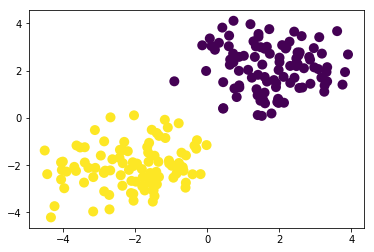

In [30]:
# 建立数据集
import torch
import matplotlib.pyplot as plt

# 假数据
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)#  类型0  x data 
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)

# 注意x, y数据的数据形式是一定要像下面一样(torch.cat是在合并数据)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), ).type(torch.LongTensor)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0)
plt.show();

### 建立神经网络


In [31]:
import torch
import torch.nn.functional as F

class Net(torch.nn.Module):  # 继承torch的module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden) # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output) # 输出层线性输出
        
    def forward(self, x): # 这同时也是module种的forward功能
        # 正向传播输入值，神经网络分析出输出值
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
net = Net(n_feature = 2, n_hidden = 10, n_output = 2)
print(net)  # 输出net的结构

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


/Users/cristalyin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


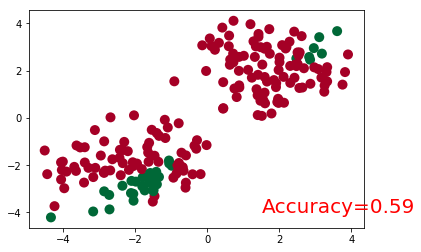

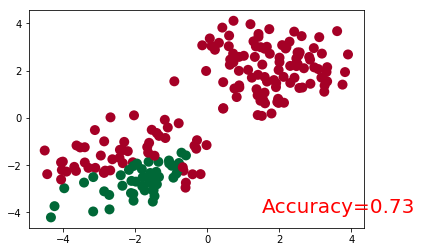

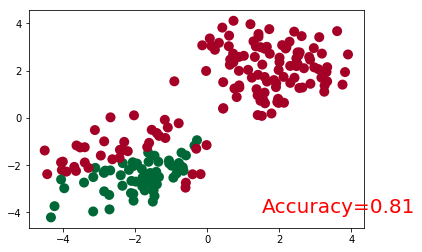

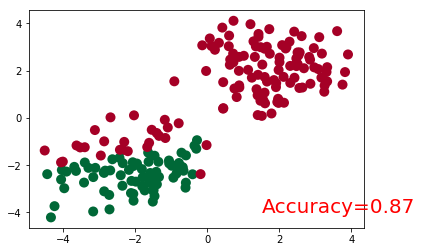

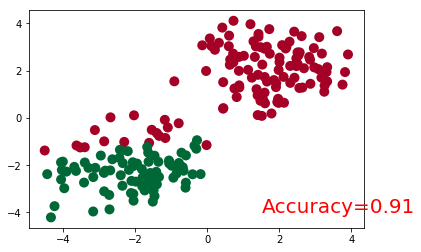

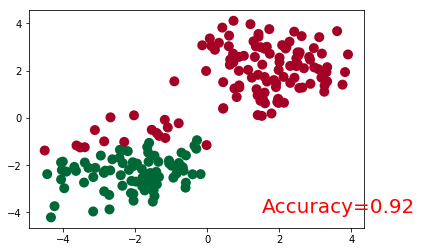

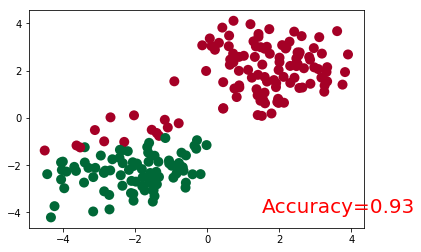

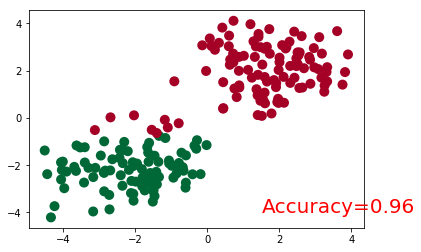

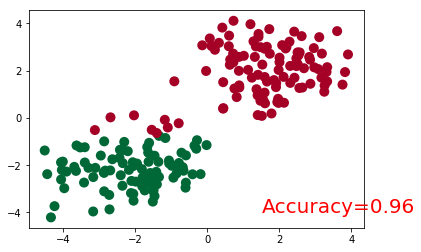

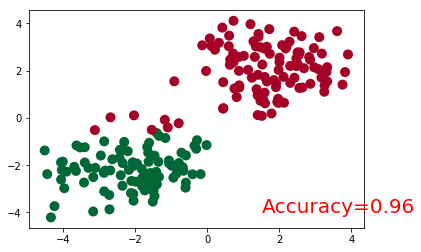

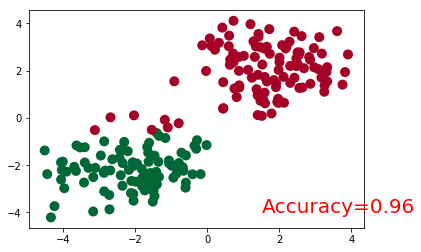

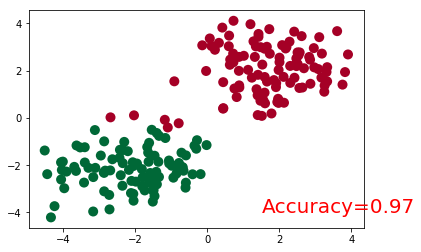

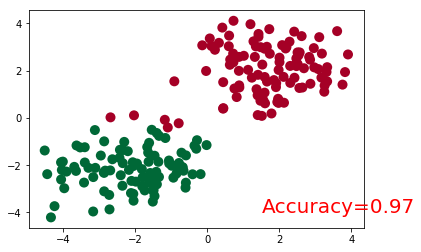

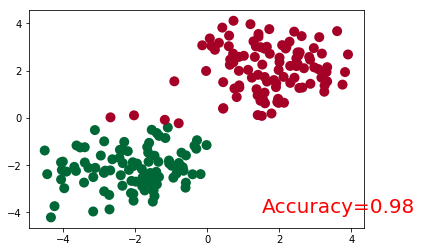

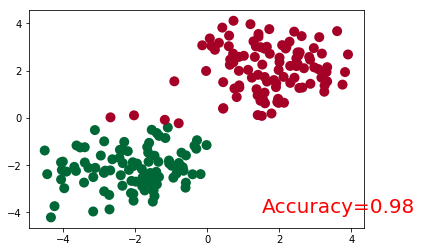

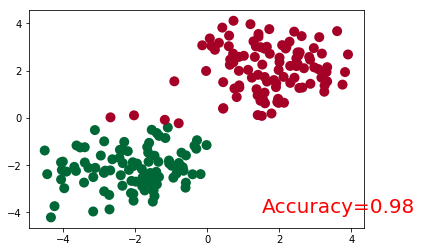

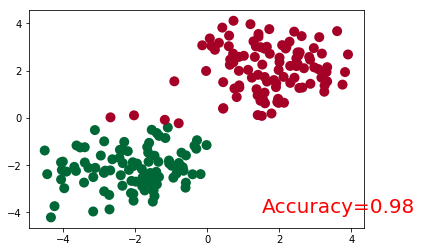

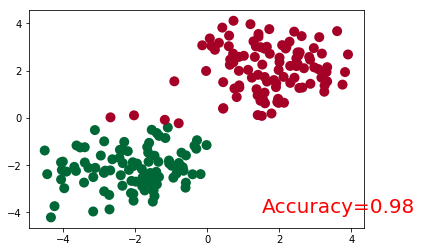

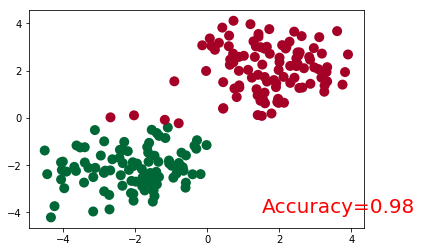

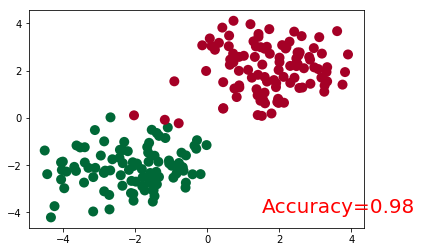

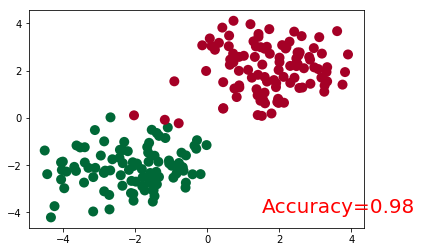

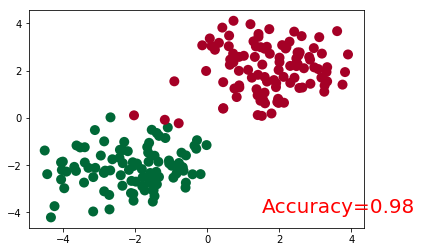

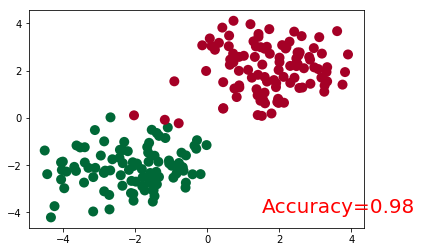

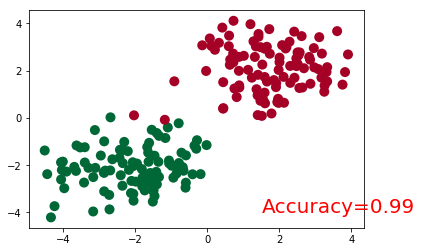

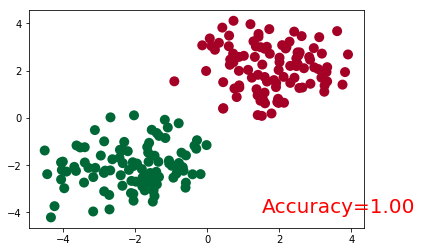

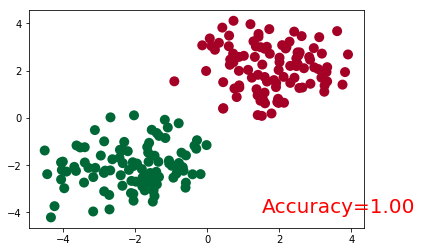

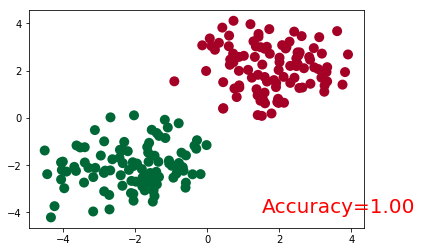

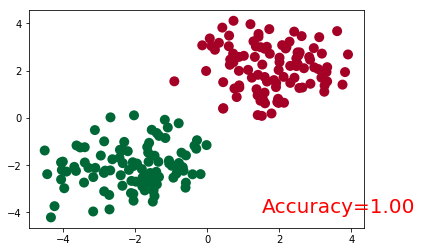

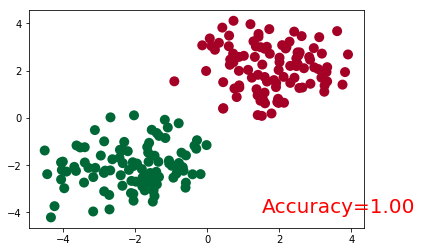

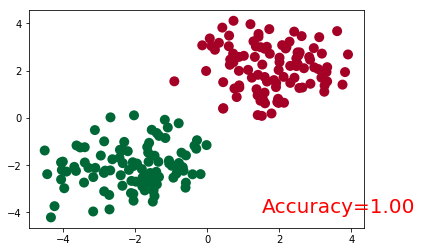

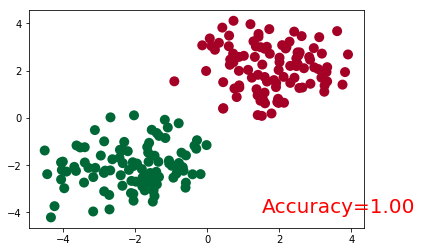

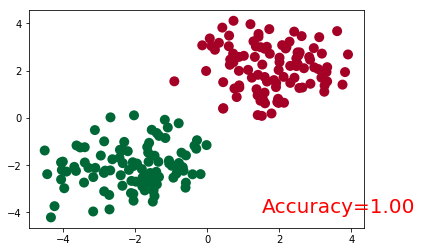

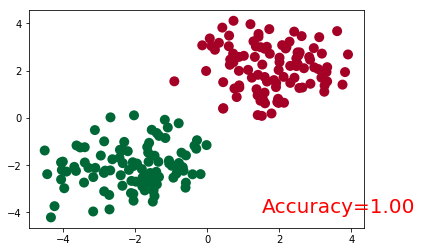

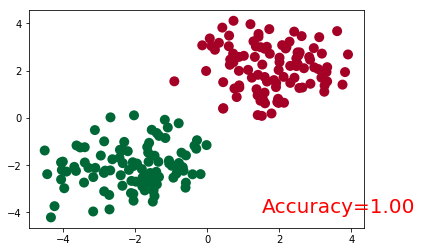

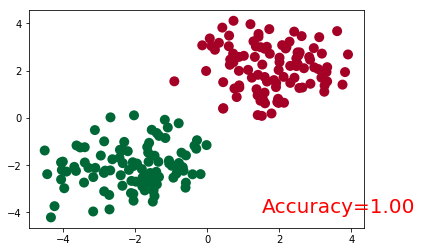

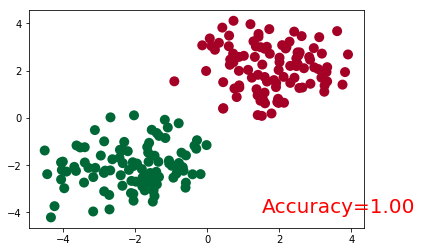

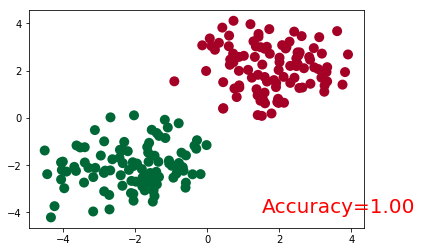

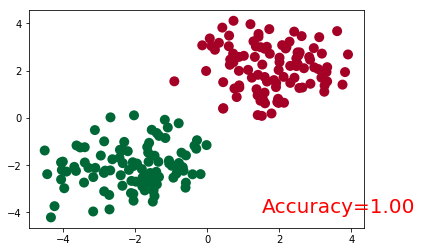

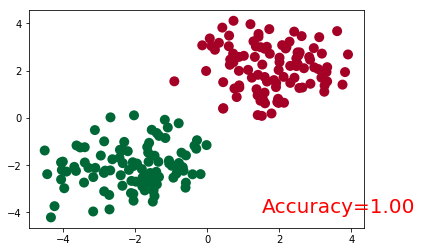

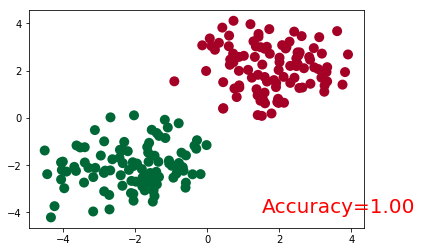

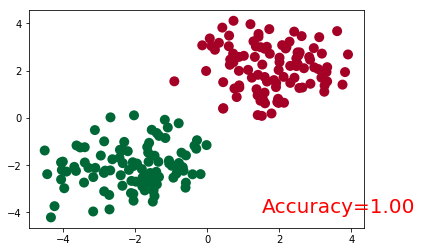

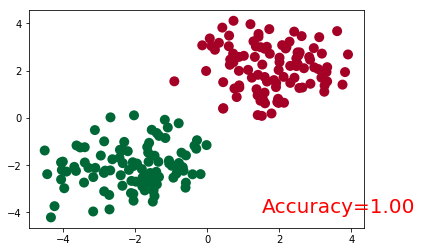

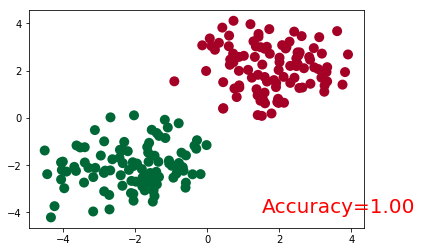

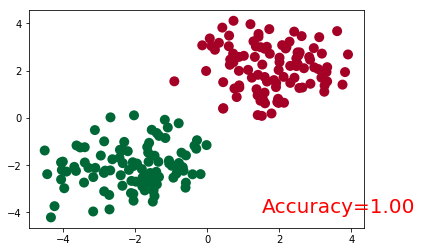

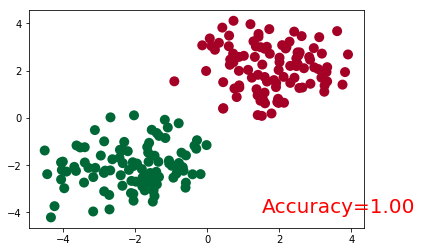

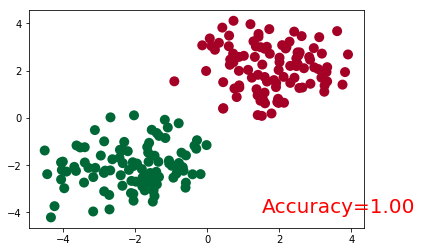

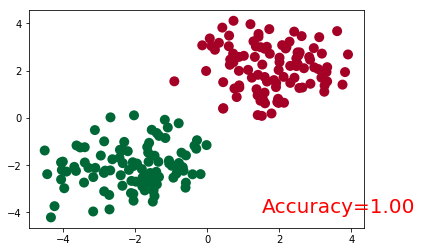

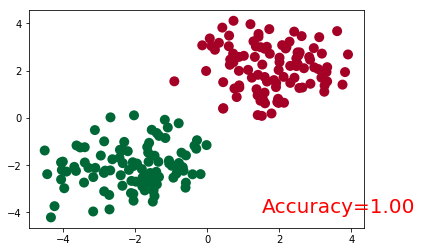

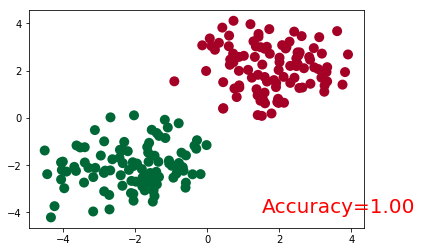

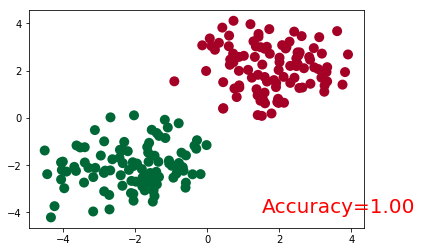

In [32]:
# 训练网络
optimizer = torch.optim.SGD(net.parameters(), lr = 0.02)
loss_func = torch.nn.CrossEntropyLoss()

for t in range(100):
    out = net(x)
    
    loss = loss_func(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 接着上面来
    if t % 2 == 0:
        plt.cla()
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        prediction = torch.max(F.softmax(out), 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)